# Instructions for running SLICEmyPDF

This notebook contains information on how to use some basic functions in the Basic Usage section and also points to internal functions that can be modified as per requirement in Advanced Usage.

## I. **Basic Usage**

## 1. Initialize object and check if page number is as expected

The first step is to create and initialize the Extractor class object using the PDF path and page number. The initialization step is important for any of the functions to work.
The page number is 1-indexed (Eg: first page of PDF is page number 1). You can view the page to be processed using get_pageview() function as shown:

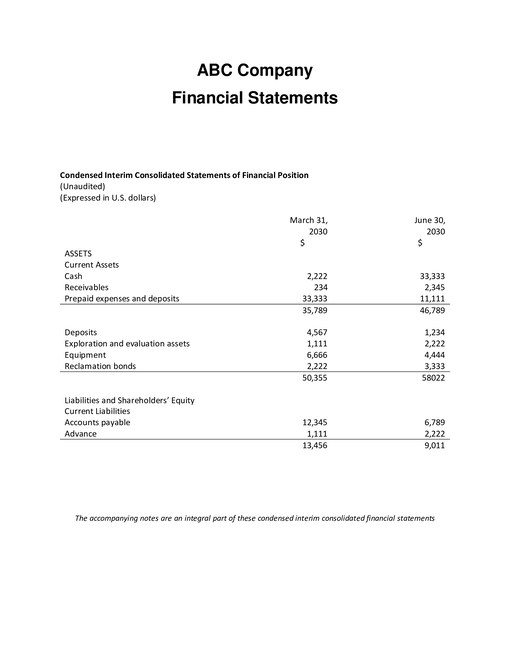

In [1]:
from slicemypdf import Extractor

table = Extractor(pdf_loc="./data/Sample_FS.pdf", page=1)
# By default does not save image
img = table.get_pageview()
img.resize(510, 660)
img

Alternatively save image to view later. A file name ending with .jpg (with path if required) should be provided as shown or by default a file name is created using the path/filename.pdf parameter. In that case, the image file can be found as path/filename.jpg

In [2]:
img = table.get_pageview(save_img=True, file_name="./images/Sample_FS_pageview.jpg")

## 2. Extract table from financial statement PDF

The main table extraction function extract() has a parameter called FS_flag which is True by default. This indicates that the page to be processed is a financial statement with the following assumptions.

#### Assumptions: 
1. Page has only 1 table 
2. Start of table marked by complete date or year (2000 or onwards)

In [3]:
table.extract()

,0,1,2
0,,2030,2030
1,ASSETS,,
2,Current Assets,,
3,Cash,2222.0,33333.0
4,Receivables,234.0,2345.0
5,Prepaid expenses and deposits,33333.0,11111.0
6,,35789.0,46789.0
7,Deposits,4567.0,1234.0
8,Exploration and evaluation assets,1111.0,2222.0
9,Equipment,6666.0,4444.0


## 3. View page after finding page divisions (rows and columns)

Page sections created to get this table can be seen using the get_gridview() fucntion.

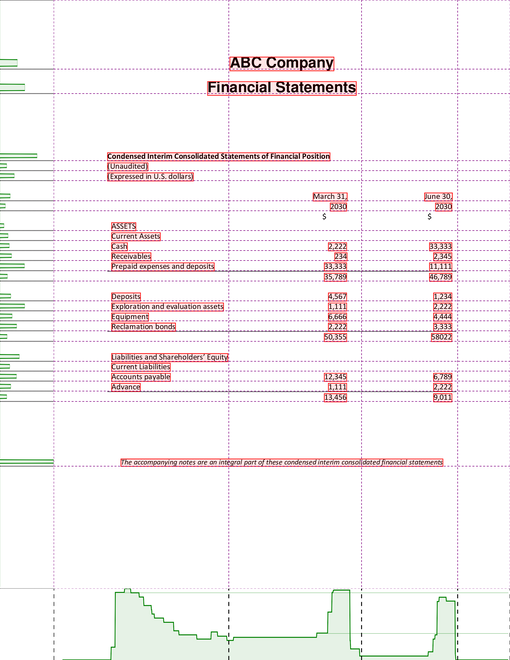

In [4]:
g_img = table.get_gridview(save_img=True, file_name="./images/Sample_FS_gridview.jpg")
g_img.resize(510, 660)
g_img

## 4. Extract table without post-processing/cleaning

The title and foot notes are removed during post-processing. If the text belonging to the whole page is required, FS_flag can be set to False.

In [5]:
table.extract(FS_flag=False)

,0,1,2
0,[],[ABC Company],[]
1,[],[Financial Statements],[]
2,[Condensed Interim Consolidated Statements of ...,[],[]
3,[(Unaudited)],[],[]
4,[(Expressed in U.S. dollars)],[],[]
5,[],"[March 31,]","[June 30,]"
6,[],[2030],[2030]
7,[ASSETS],[],[]
8,[Current Assets],[],[]
9,[Cash],"[2,222]","[33,333]"


## 5. Save extracted table as CSV file

In [6]:
extracted_table_FS = table.extract()
# Save dataframe to .csv file
output_filename = "./output/extracted_table_FS.csv"
extracted_table_FS.to_csv(output_filename, index=None, header=True)

## 6. Extracting tables other than Financial Statements

In [7]:
table2 = Extractor(pdf_loc="./data/Sample_reg_borders.pdf", page=1)
img2 = table2.get_pageview()
img2.resize(510,660)

True

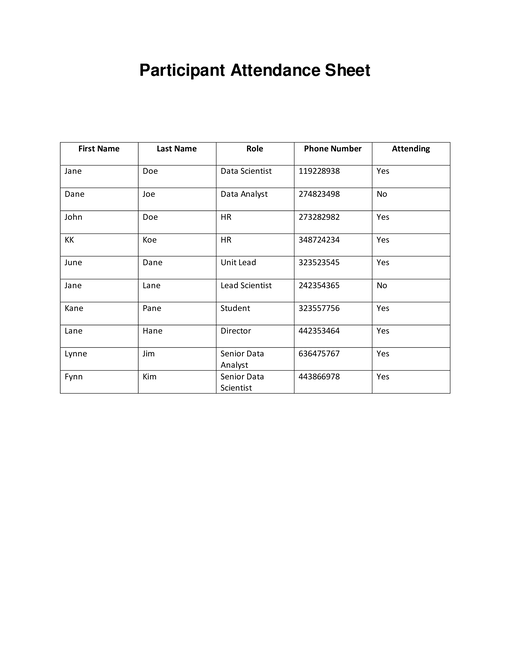

In [8]:
img2

Remember to set FS_flag to False. The extracted table might need more post-processing to combine rows like in the example below. Check _post_process_extracted_table() function in slicemypdf.py to get an idea how to create your own custom post-processing code.

In [9]:
table2.extract(FS_flag=False)

,0,1,2,3,4
0,[],[],[],[Participant Attendance Sheet],[]
1,[First Name],[Last Name],[Role],[Phone Number],[Attending]
2,[Jane],[Doe],[Data Scientist],[119228938],[Yes]
3,[Dane],[Joe],[Data Analyst],[274823498],[No]
4,[John],[Doe],[HR],[273282982],[Yes]
5,[KK],[Koe],[HR],[348724234],[Yes]
6,[June],[Dane],[Unit Lead],[323523545],[Yes]
7,[Jane],[Lane],[Lead Scientist],[242354365],[No]
8,[Kane],[Pane],[Student],[323557756],[Yes]
9,[Lane],[Hane],[Director],[442353464],[Yes]


**The extracted table is in Pandas Dataframe format, it can be assigned to a variable and easily used/saved as a regular pandas dataframe object.**

## **II. Advanced Usage**

Instead of using the wrapper function extract(), individual functions that are involved in SLICE algorithm can be used as well based on individual requirement.

## 1. Find page divisions using _get_token_coordinates()

Setting draw_img to True gives the same images as get_gridview() to guide fine-tuning. Output parameters are as follows:
1. _Coordinate_table_ is a pandas dataframe object and gives information about token on a page,
2. _Vertical_distance_list_ is a list and gives location of vertical table sections
3. _Horizontal_distance_list_ is a list and gives location of horizontal table sections
4. _img_ is an image object of the sectioned page with histogram plot
5. _original_ is an image object of the sectioned page without histogram plot

In [10]:
table3 = Extractor(pdf_loc="./data/Sample_reg_noborders.pdf", page=1)
coordinate_table, ver_list, hor_list, img3, original = table3._get_token_coordinates(draw_img=True)

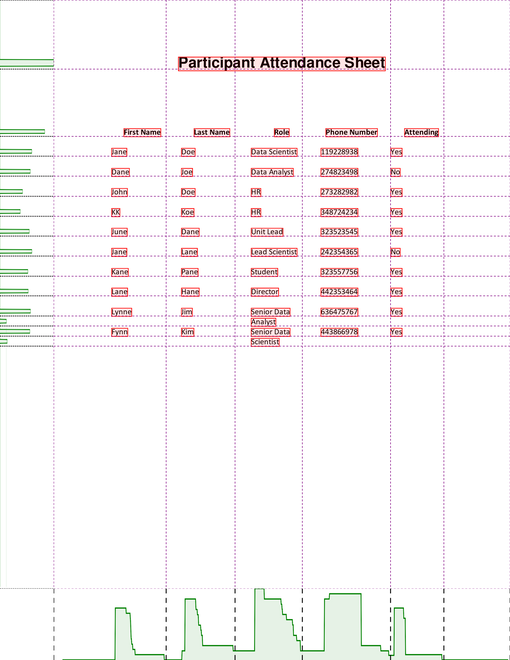

In [11]:
img3.resize(510,660)
img3

The histogram on the bottom and left of the page show black pixel concentration on each axis. Valleys guide the algorithm to possible page divisions. The oage division is optimized but it is possible to play around with some internal parameters like:
1. dist_threshold - integer value to split tokens(text in red boxes)
2. ver_prominence - prominence value for scipy.signal.find_peaks() 
3. hor_prominence - prominence value for scipy.signal.find_peaks() 

Add your custom integer/float values while creating the Extractor object:

Extractor( pdf_loc="",page=1, dist_threshold=25, ver_prominence=None, hor_prominence=None)

## 2. Get extracted table without post_processing using _convert_page_to_table()

The next step in SLICE is _convert_page_to_table(). The output parameters are as follows:
1. _coordinate_intersection_ is a geopandas object and gives text mapped to each section
2. _extracted_table_ is a pandas dataframe object and contains all text in tabular format without post-processing
3. _date_table_ is a pandas dataframe object and gives location of dates in the table

In [ ]:
coordinate_intersection, extracted_table, date_table = table3._convert_page_to_table(coordinate_table, ver_list, hor_list)

## 3. Get clean extracted table for financial documents using _post_process_extracted_table()

The last step involves post-processing which is specific to financial statements. The _post_process_extracted_table function can be used as a guide to create a custom post-processsing function. The input parameter and output parameter _extracted_table_ and _extracted_table_final_ is a Pandas dataframe object.

In [ ]:
# Running this function on non-financial statements will give an error or unexpected results
extracted_table_final = table3._post_process_extracted_table(extracted_table, date_table)